# Exercise Chapter 6

## Problem Statement

An automobile company wants to enter the U.S. market by setting up a manufacturing plant there and producing cars locally to compete with its American and European competitors.

The company has hired an automotive consulting firm to understand the factors on which car pricing depends. Specifically, the company wants to understand the factors that affect car pricing in the U.S. market, as these can be very different from those in the Chinese market. The company wants to know:

What variables are important in predicting the price of a car.
How well these variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set on different types of cars in the American market.

## Regression problems

There are five basic steps when you implement linear regression:

1. Import the packages and classes you need.

2. Provide data to work with and possibly perform appropriate transformations.

3. Create a regression model and fit it with the available data.

4. Review the results of the model fit to know if the model is satisfactory.

5. Apply the model for predictions.

These steps are more or less general to most regression approaches and implementations.

### Step 1: Import the packages

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from scipy.stats import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr,spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.base import TransformerMixin

from plotnine import *

ModuleNotFoundError: No module named 'statsmodels'

### Step 2: Provide data to work with and possibly perform appropriate transformations.

1. Download the following dataset, CarPrice_Assignment.csv, from this Kaggle link (save this data frame as Pandas DataFrame):

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

or from my personal Github page.

https://raw.githubusercontent.com/pairote-sat/SCMA248/main/Data/CarPrice_Assignment.csv

In [2]:
url = 'https://raw.githubusercontent.com/pairote-sat/SCMA248/main/Data/CarPrice_Assignment.csv'

df = pd.read_csv(url)

In [3]:
# df.info()

#### 2.1 Data Preprocessing and Feature Engineering

**What is data preprocessing?**

It is a technique used to transform raw data into more meaningful data, or data that can be understood by a machine learning model. Real-world data is often incomplete, inconsistent, and/or lacks certain behaviors or trends and is likely to contain many errors. To address this problem, data preprocessing techniques are introduced. We will talk about some of the data preprocessing techniques, namely :
Vectorization
Normalization
Treatment of missing values


**What is Feature engineering?**

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. 

In order for machine learning to work well on new tasks, it may be necessary to develop and train better features. 

Feature engineering, in simple terms, is the transformation of raw data into desired features using statistical or machine learning techniques.

#### 2.2 Missing values

When it comes to preparing your data for machine learning, missing values are one of the most typical problems. Human error, data flow interruptions, privacy concerns, and other factors can lead to missing values. Missing values, for whatever reason, affect the performance of machine learning models.

2. Write python code to check whether any missing values are there in the dataset.

In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### 2.3 Handling Outliers

Outlier treatment is a technique for removing outliers from a data set. This method can be used on a variety of scales to obtain a more accurate representation of data. This has an impact on the performance of the model. Depending on the model, the impact can be large or minimal. For example, linear regression is particularly susceptible to outliers. This procedure should be completed prior to model training.

3. Write Python code to plot the distribution of the car prices. 

4. Complete the following tasks:

4.1 Identify (or list) all values that are outliers. 

4.2 How many outliers are there?

4.3 What can you say about the shape of this distribution?

5. We will use the log transformation to convert a skewed distribution to a normal or less skewed distribution. Write Python code to add a new column called 'log_price' that contains the logarithmic base 10 of the car prices.

6. Write Python code to plot the distribution of the values of the `log_ price` variable. 

6.1 After log transformation, identify (or list) all values that are outliers the values of the `log_ price` variable. 

#### 2.4 Scaling

**Feature scaling** is one of the most common and difficult problems in machine learning, but also one of the most important if you want to do it right. 

To train a predictive model, we need data with a known set of features that must be scaled up or down as appropriate. 

If we do not have comparable scales, some of the coefficients obtained by fitting the regression model could be very large or very small compared to the other coefficients. There are two common methods of rescaling:

* Min-Max scaling

* Standardisation (mean-0, sigma-1).

After scaling, continuous features become similar in terms of range. Although this step is not required for many algorithms, it is still a good idea to perform it. 

Distance-based algorithms such as k-NN and k-Means, on the other hand, require scaled continuous features as model input. 

Here we will use the standardisation scaling.

See the following link for more details:
https://hersanyagci.medium.com/feature-scaling-with-scikit-learn-for-data-science-8c4cbcf2daff

7. Perform the standardisation scaling to all numeric feature variables (not the target (or response) variable, namely `price` and `log_price`.

#### 2.5 Correlation Analysis

The linear correlation between variable pairs is investigated using correlation analysis. This may be accomplished by combining the `corr()` and `sns.heatmap()` functions.

8. Write Python code to create the correlation matrix of the dataset which has been completely preprocessed.



9. Identify (list) which numeric variables have a significant positive correlation with `log_price`.

10. Identify (list) which numeric variables have a significant negative correlation with `log_price`.

#### 2.6 Exploratory data analysis

It is now time to experiment with the data and make some visualizations.

In our dataset, a **pairplot** plots pairwise relationships. The pairplot function creates a grid of Axes in which each variable in the data is shared across a single row and a single column on the y-axis.

A pairs plot shows the distribution of single variables as well as the relationships between them. Pair plots are a great way to detect trends for further study, and they're simple to create in Python!

11. Write Python code to create pair plots of the feature and target variables (you may choose to include only features which have a significant correlation (as obtained from questions 9 and 10).

12. Explain the results you obtained.

### Step 3: Create a regression model and fit it with the available data.

Let us start with the simplest case, simple linear regression. We will use `log_price` as the dependent variable and the feature variable with highest correlation to the output `log_price` as an independent variable.

13. What is the variable with the highest correlation to the output `log_price`?

#### 3.1 Split the data into training and test subset

To check the performance of a model, you should test it with new (test) data, that is with observations not used to fit (train) the model. 

14. Use scikit-learn’s `train_test_split()` to split your dataset into the training and test subsets. You must specifiy the arguements `random_state=id1` and `test_size= 0.3` for the `train_test_split()` function.

15. Use either `statsmodel` or `scikit-learn` libraries to create the simple linear regression model and fit it with the **training data**.

### Step 4: Get results

Once you have fitted your model, you can get the results to verify that the model is working satisfactorily and interpret it.

We will obtain the following properties of the model.

16. Write Python to print out the coefficient of determination (R-squared).

17. Write Python to print out the intercept of the model.

18.  Write Python to print out the slope (coefficient of the chosen feature) of the model.

### Step 5: Predict response

Once you have a satisfactory model, you can use it for predictions with new data.

19. Make predictions for the test set. Add a new column of prediction values to the test set. Show the first five rows of the test set of the following columns: 

* the feature column that used for the model,

* the `log_price`, and 

* the predictions.

20. For model evaluation, write Python to calculate the following quantitative measurements on **the test set**

20.1 MAE, 

20.2 MSE, and 

20.3 R squared. 

21. (5 extra points) Write Python code to visualize the predictions of the linear regression. These may include:

* Scatter plot of actual vs predicted Values

* Density plot of actual vs Predicted Values

* Residual plot (prediction Error)

Give the graphs appropriate labels and titles.

Segregation of Numerical and Categorical Variables/Columns

In [187]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
#df_cat = df[cat_col]
#df_num = df[num_col]

print(num_col)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


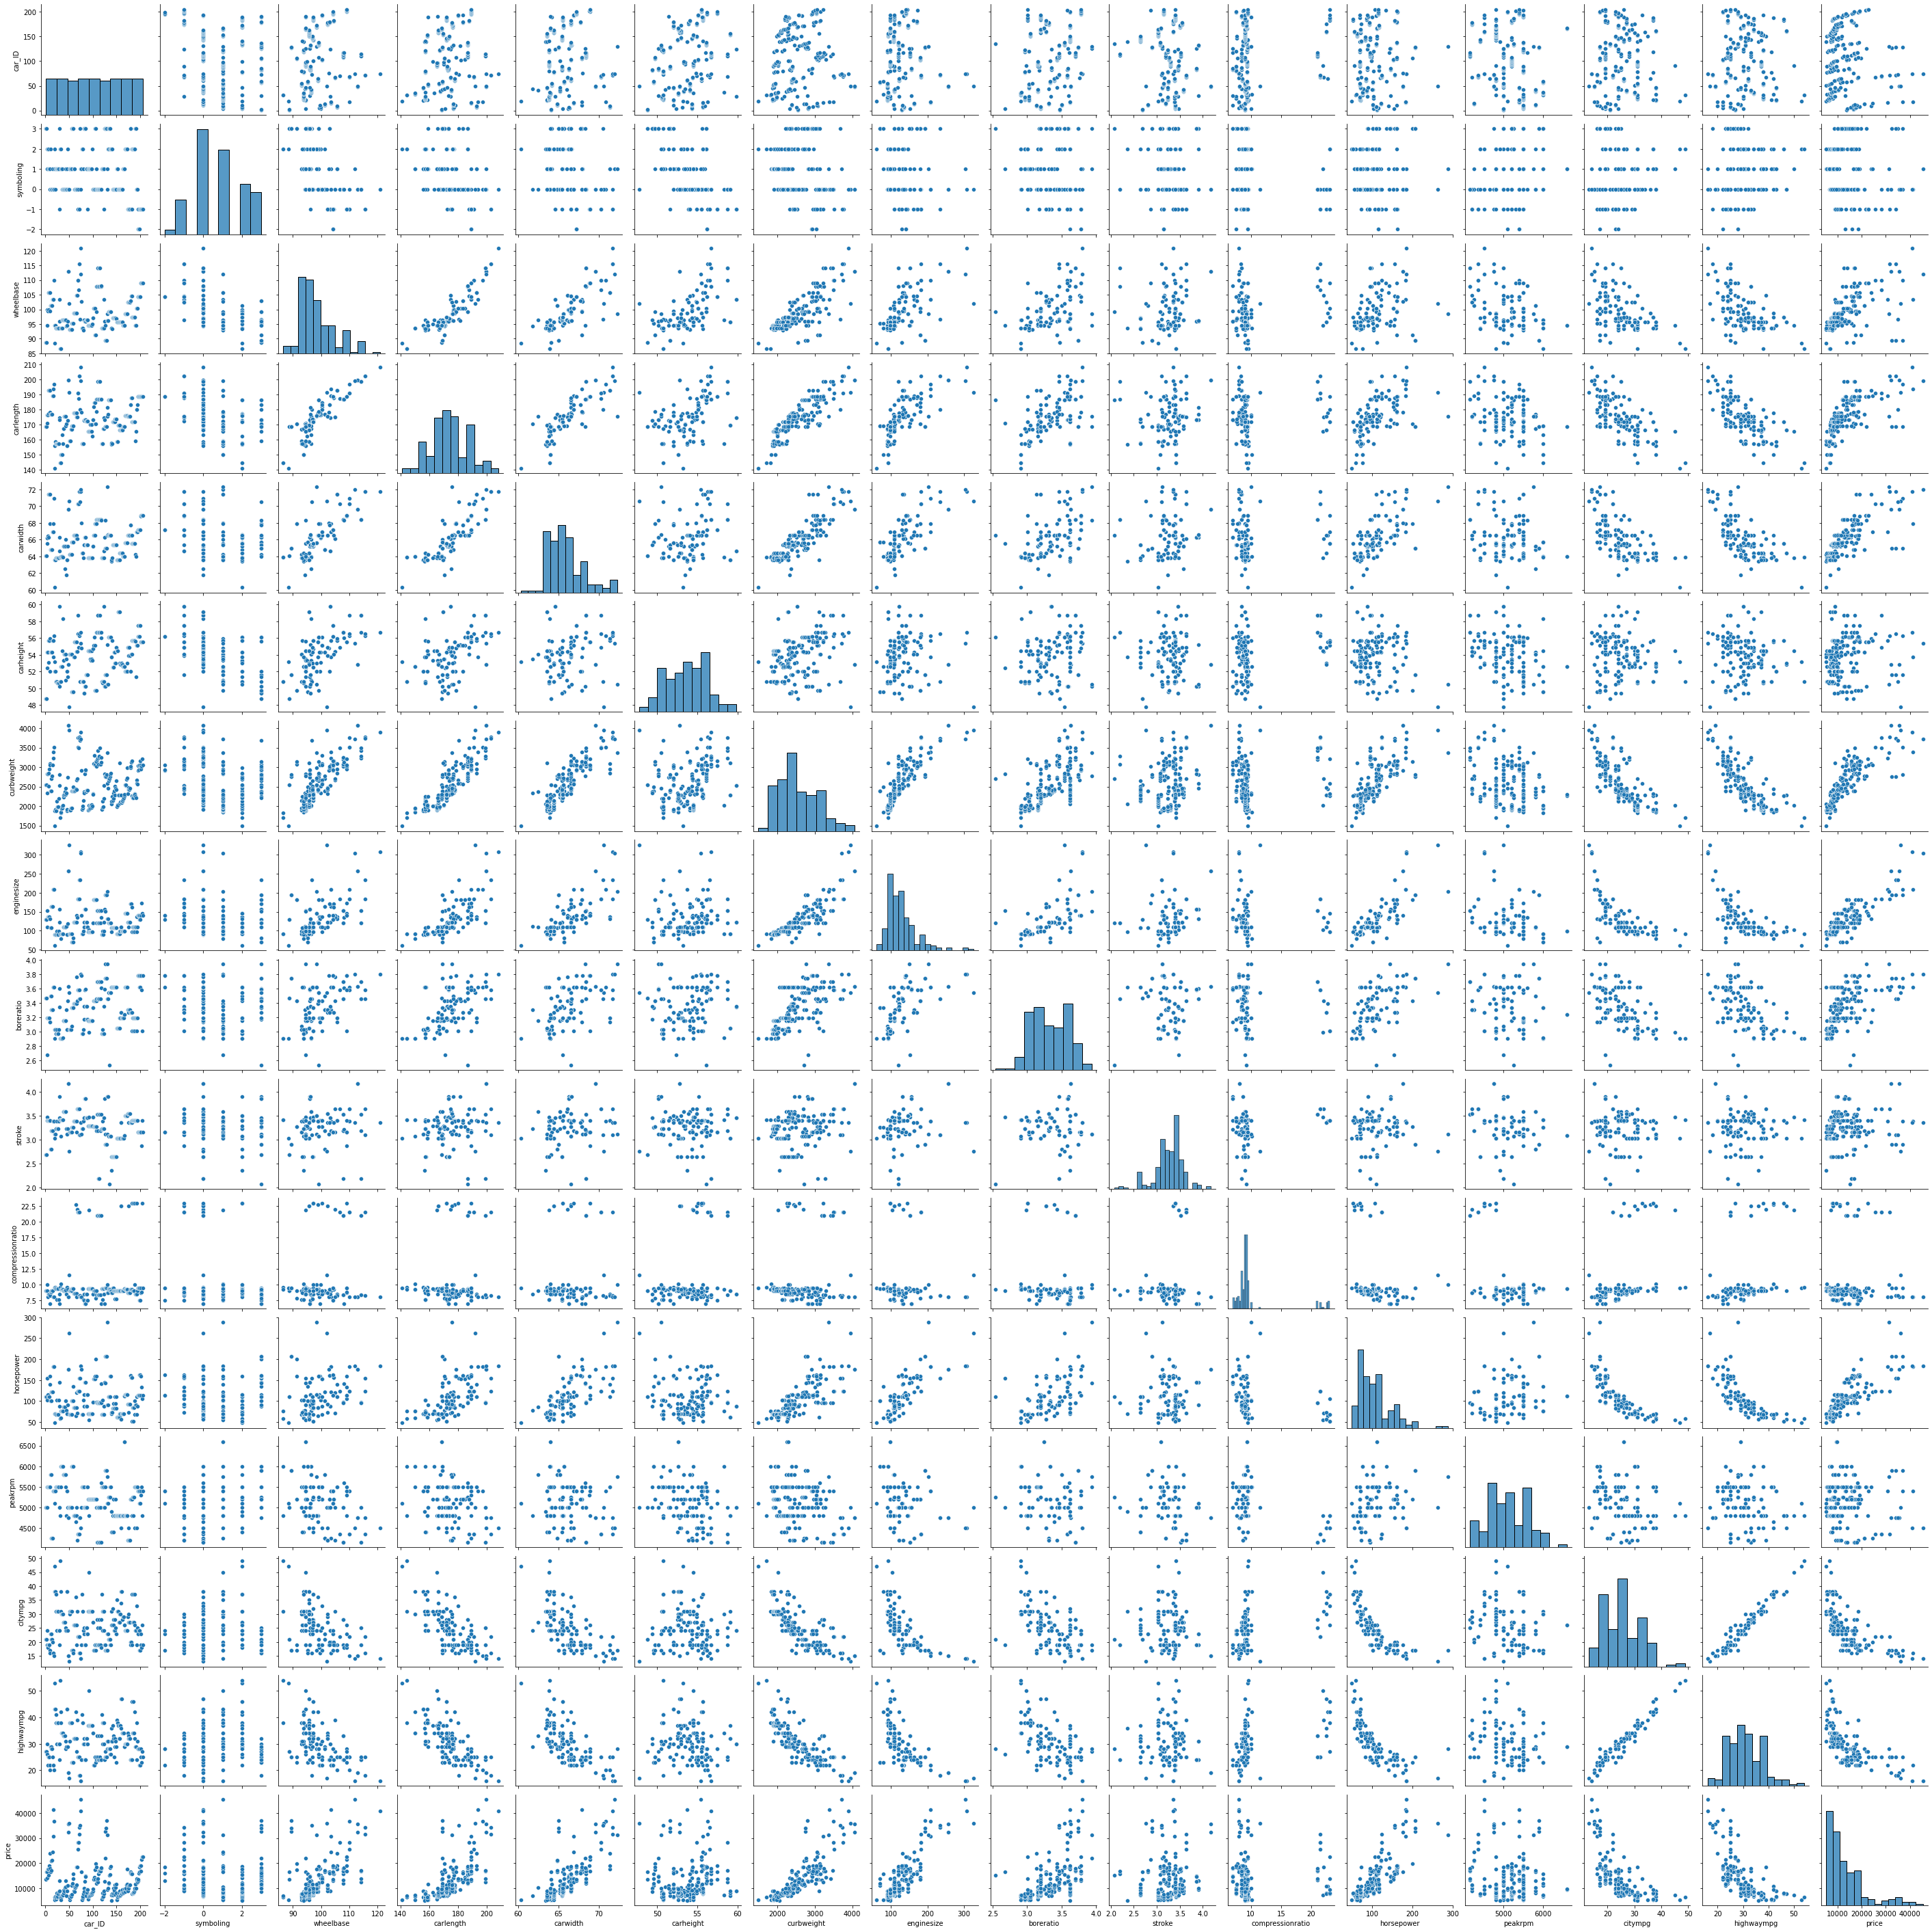

In [6]:
sns.pairplot(df)

Write python code to check whether any missing values are there in the dataset.

In [188]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Outlier analysis of the target variable

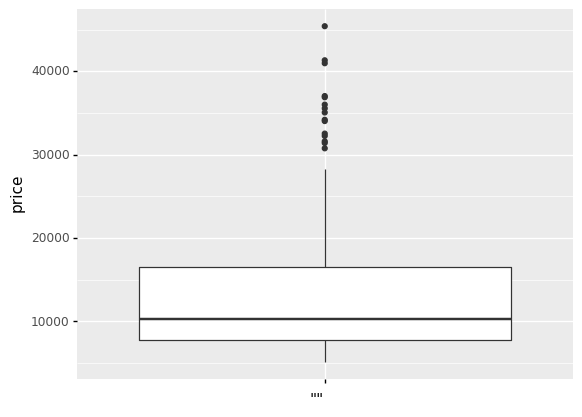

<ggplot: (338768225)>

In [189]:
(ggplot(df) + aes(x = '""',y = 'price') + geom_boxplot()
)

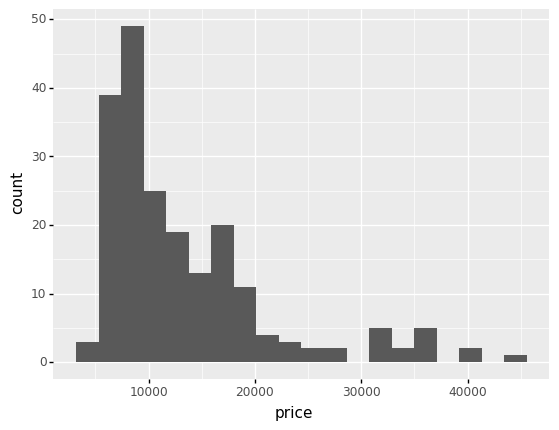

<ggplot: (338977197)>

In [190]:
(
    ggplot(df) + aes(x = 'price') + geom_histogram(bins = 20)
)    

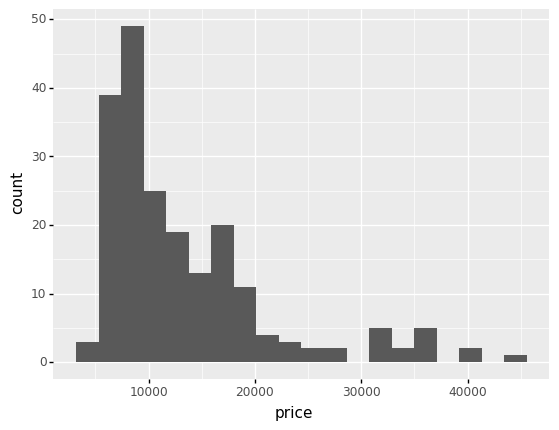

<ggplot: (338775693)>

In [191]:
(
    ggplot(df) + aes(x = 'price') + geom_histogram(bins = 20)
)   

In [192]:
df['log_price'] = np.log10(df['price'])

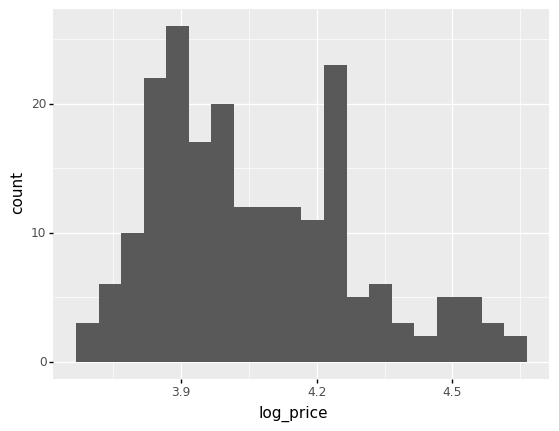

<ggplot: (338949061)>

In [193]:
(
    ggplot(df) + aes(x = 'log_price') + geom_histogram(bins = 20)
) 

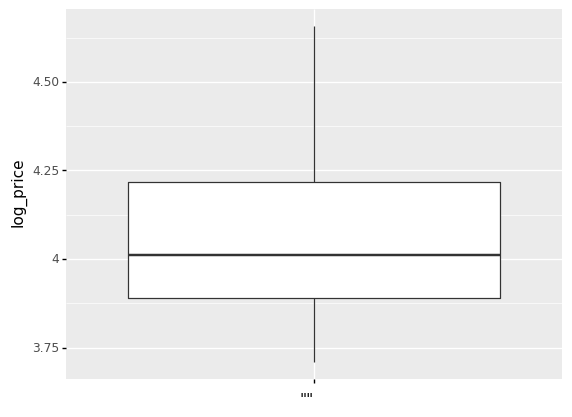

<ggplot: (337567781)>

In [194]:
(ggplot(df) + aes(x = '""',y = 'log_price') + geom_boxplot()
)

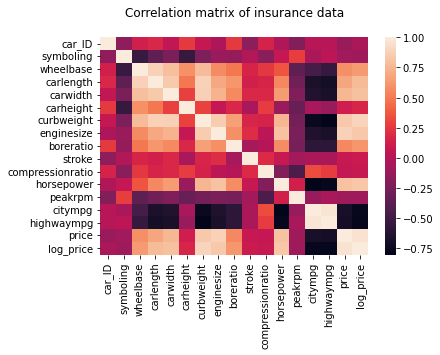

In [28]:
hm = sns.heatmap(df.corr(), annot = False)
hm.set(title = "Correlation matrix of insurance data\n")
plt.show()

Identify which numeric variables have a significant positive correlation with price.

1. carwidth , carlength, curbweight ,enginesize ,horsepower seems to have a poitive correlation with price.

2. carheight doesn't show any significant trend with price.


Identify which numeric variables have a significant negative correlation with price.

1. citympg , highwaympg - seem to have a significant negative correlation with price.

Standarization scaling

Segregation of Numerical and Categorical Variables/Columns

In [195]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
#df_cat = df[cat_col]
#df_num = df[num_col]

print(num_col)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'log_price'],
      dtype='object')


In [196]:
num_col

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'log_price'],
      dtype='object')

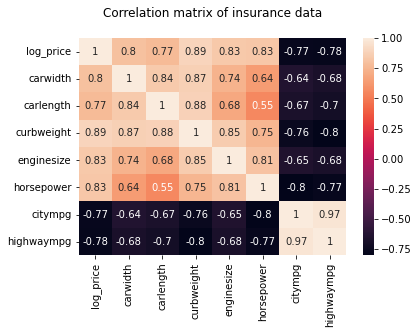

In [197]:
hm = sns.heatmap(df[['log_price','carwidth' , 'carlength', 'curbweight' ,'enginesize' ,'horsepower','citympg' , 'highwaympg']].corr(), annot = True)
hm.set(title = "Correlation matrix of insurance data\n")
plt.show()

#df[['carwidth' , 'carlength', 'curbweight' ,'enginesize' ,'horsepower']]

In [199]:
selected_var = ['enginesize','curbweight' ,'citympg' ]

Splitting the Data into Training and Testing Sets¶


In [200]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio
id = 888
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = id)

Rescaling the Features¶

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

* Min-Max scaling

* Standardisation (mean-0, sigma-1).

Here we will use the standardisation scaling.

In [201]:
scaler = preprocessing.StandardScaler()


In [202]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[selected_var] = scaler.fit_transform(df_train[selected_var])

In [203]:
df_train[selected_var].describe()

,enginesize,curbweight,citympg
count,1.430000e+02,1.430000e+02,1.430000e+02
mean,-3.058936e-16,3.680040e-16,1.564405e-16
std,1.003515e+00,1.003515e+00,1.003515e+00
min,-1.345276e+00,-1.630690e+00,-1.907109e+00
25%,-7.199452e-01,-8.197158e-01,-9.607240e-01
50%,-2.083110e-01,-2.239940e-01,-1.720700e-01
75%,3.829107e-01,7.531408e-01,7.743148e-01
max,4.475984e+00,2.812205e+00,3.771200e+00


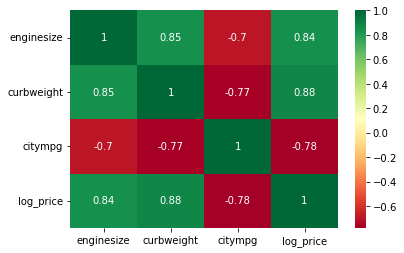

In [204]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure()
sns.heatmap(df_train[selected_var + ['log_price']].corr(), cmap="RdYlGn", annot = True)
plt.show()

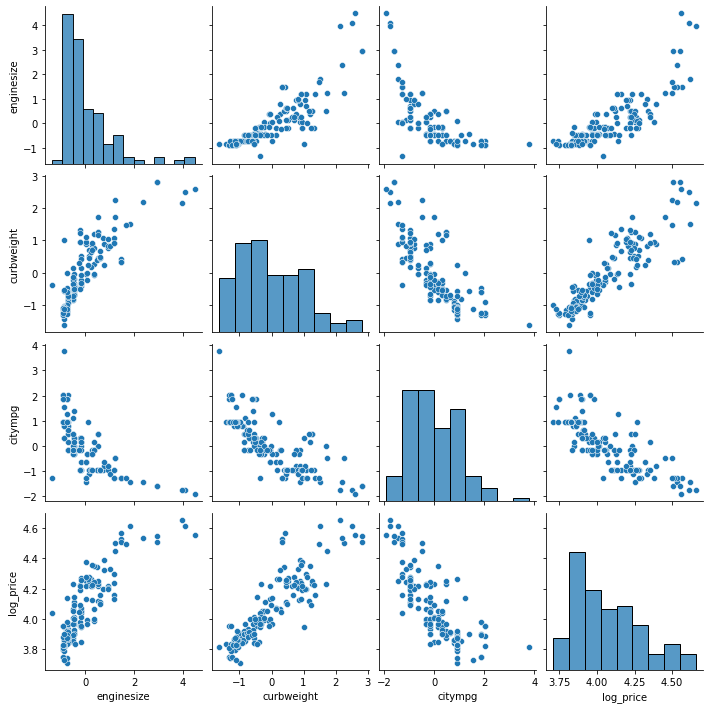

In [205]:
sns.pairplot(df_train[selected_var + ['log_price']])

Dividing into X and Y sets for the model building¶

In [207]:
y_train = df_train['log_price']
X_train = df_train[selected_var]

In [208]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [209]:
model1 = smf.ols(formula='log_price ~ enginesize', data=df_train).fit()

In [210]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     341.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.71e-39
Time:                        14:56:56   Log-Likelihood:                 99.824
No. Observations:                 143   AIC:                            -195.6
Df Residuals:                     141   BIC:                            -189.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0737      0.010    401.792      0.000       4.054       4.094
enginesize     0.1874      0.010     18.480      0.000       0.167       0.207
==============================================================================
Omnibus:                        2.510   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.477
Skew:                           0.267   Prob(JB):                        0.290
Kurtosis:                       2.638   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Let's visualise the data with a scatter plot and the fitted regression line

In [211]:
df_train['model1_prediction'] = model1.predict(X_train)
df_train['model1_residual'] = y_train - model1.predict(X_train)

df_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price,model1_prediction,model1_residual
99,100,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,...,3.47,8.5,97,5200,0.301122,34,8949.0,3.951775,4.034630,-0.082855
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,3.35,22.5,56,4500,1.405238,36,7898.0,3.897517,3.992024,-0.094506
85,86,1,mitsubishi montero,gas,std,four,sedan,fwd,front,96.3,...,3.46,8.5,88,5000,-0.014339,32,6989.0,3.844415,4.043151,-0.198736
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,3.90,8.7,90,5100,-0.329801,31,9895.0,3.995416,4.085757,-0.090341
171,172,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,...,3.50,9.3,116,4800,-0.172070,30,11549.0,4.062544,4.145405,-0.082861


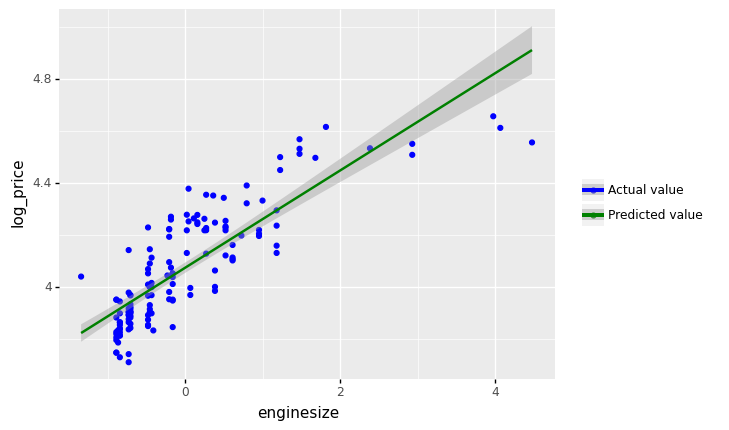

<ggplot: (330999921)>

In [212]:
(
    ggplot(df_train) + aes(x = 'enginesize', y='log_price')
    + geom_point(aes(color='"Actual value"')) 
    + geom_smooth(aes(color='"Predicted value"'), method='lm')
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
)

In [213]:
df_train['model1_prediction'] = model1.predict(X_train)
df_train['model1_residual'] = y_train - model1.predict(X_train)

df_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price,model1_prediction,model1_residual
99,100,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,...,3.47,8.5,97,5200,0.301122,34,8949.0,3.951775,4.034630,-0.082855
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,3.35,22.5,56,4500,1.405238,36,7898.0,3.897517,3.992024,-0.094506
85,86,1,mitsubishi montero,gas,std,four,sedan,fwd,front,96.3,...,3.46,8.5,88,5000,-0.014339,32,6989.0,3.844415,4.043151,-0.198736
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,3.90,8.7,90,5100,-0.329801,31,9895.0,3.995416,4.085757,-0.090341
171,172,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,...,3.50,9.3,116,4800,-0.172070,30,11549.0,4.062544,4.145405,-0.082861


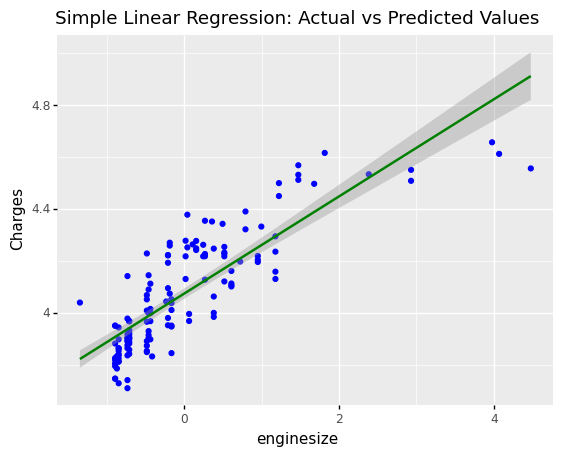

<ggplot: (332764857)>

In [214]:
(
    ggplot(df_train, aes(x = 'enginesize', y='log_price'))
    + geom_point(color='blue')
    + geom_smooth(method='lm',color='green')
    + labs(y='Charges', title = 'Simple Linear Regression: Actual vs Predicted Values')
    + scale_fill_manual(
    values = ['Actual values','Predicted values'],
    name = " ", labels = ['Actualvalues','Predicted values'] )
)

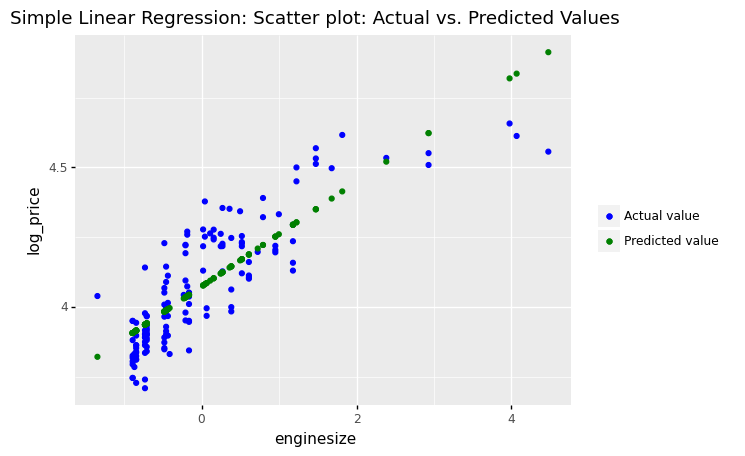

<ggplot: (332770749)>

In [215]:
(
    ggplot(df_train) 
    + geom_point(aes(x = 'enginesize', y='log_price',color='"Actual value"'))     
    + geom_point(aes(x = 'enginesize', y='model1_prediction',color='"Predicted value"')) 
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
    + labs(y='log_price', title = 'Simple Linear Regression: Scatter plot: Actual vs. Predicted Values')
)

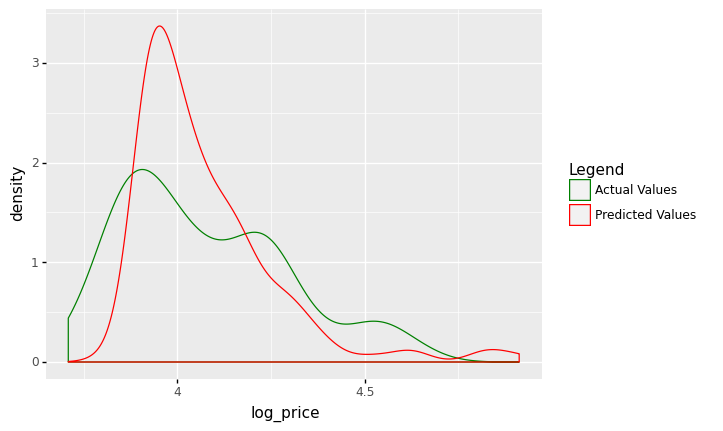

<ggplot: (331138065)>

In [216]:
(
    ggplot(df_train, aes(x='log_price'))
    +  geom_density(aes(y=after_stat('density'),color='"Actual Values"' ))
    +  geom_density(aes(x='model1_prediction',y=after_stat('density'),color='"Predicted Values"')) 
    +  scale_color_manual(values = ['green','red'], name = 'Legend') 
)

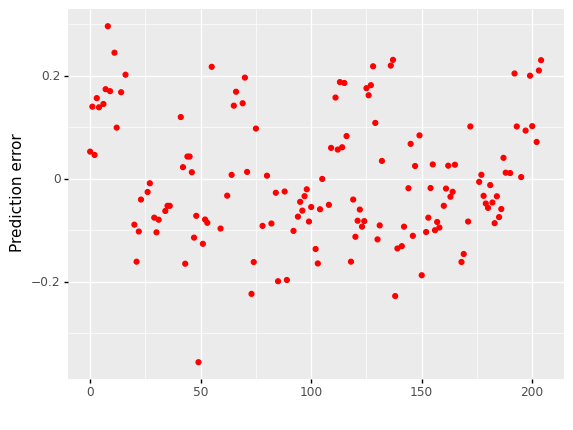

<ggplot: (339380181)>

In [217]:
(
    ggplot(df_train, aes(x='df_train.index'))
    +  geom_point(aes(y='model1_residual'),color='red')
    + labs(x = ' ', y='Prediction error')
)

In [218]:
from sklearn.metrics import * 

print('Mean Absolute Error:', mean_absolute_error(y_train.values , df_train['model1_prediction'].values))
print('Mean Squared Error:', mean_squared_error(y_train.values , df_train['model1_prediction'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train.values , df_train['model1_prediction'].values)))
print('R-squared:',r2_score(y_train.values , df_train['model1_prediction'].values))

output_df = pd.DataFrame(columns=['MAE','MSE','R2-Score'],index=['Linear Regression','Multiple Linear Regression'])
output_df['MAE']['Linear Regression'] = np.mean(np.absolute(y_train.values - df_train['model1_prediction'].values))
output_df['MSE']['Linear Regression'] = np.mean((y_train.values - df_train['model1_prediction'].values) ** 2)
output_df['R2-Score']['Linear Regression'] = r2_score(y_train.values, df_train['model1_prediction'].values)



Mean Absolute Error: 0.09868531570781863
Mean Squared Error: 0.014493961730686952
Root Mean Squared Error: 0.12039087062849471
R-squared: 0.7077864646218535


In [219]:
output_df

,MAE,MSE,R2-Score
Linear Regression,0.098685,0.014494,0.707786
Multiple Linear Regression,NaN,NaN,NaN


Multiple Linear Regression

In [220]:
y_train = df_train['log_price']
X_train = df_train[selected_var]

In [221]:
selected_var

['enginesize', 'curbweight', 'citympg']

In [222]:
model2 = smf.ols(formula='log_price ~ enginesize + curbweight + citympg', data=df_train).fit()

In [223]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     224.2
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           4.69e-53
Time:                        14:57:22   Log-Likelihood:                 138.04
No. Observations:                 143   AIC:                            -268.1
Df Residuals:                     139   BIC:                            -256.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0737      0.008    521.129      0.000       4.058       4.089
enginesize     0.0663      0.015      4.484      0.000       0.037       0.095
curbweight     0.1052      0.017      6.315      0.000       0.072       0.138
citympg       -0.0461      0.012     -3.711      0.000      -0.071      -0.022
==============================================================================
Omnibus:                       10.294   Durbin-Watson:                   2.403
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.400
Skew:                           0.599   Prob(JB):                      0.00552
Kurtosis:                       3.558   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Let's visualise the data with a scatter plot and the fitted regression line

In [224]:
df_train['model2_prediction'] = model2.predict(X_train)
df_train['model2_residual'] = y_train - model2.predict(X_train)

df_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,log_price,model1_prediction,model1_residual,model2_prediction,model2_residual
99,100,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,...,97,5200,0.301122,34,8949.0,3.951775,4.034630,-0.082855,3.995817,-0.044043
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,56,4500,1.405238,36,7898.0,3.897517,3.992024,-0.094506,3.920153,-0.022636
85,86,1,mitsubishi montero,gas,std,four,sedan,fwd,front,96.3,...,88,5000,-0.014339,32,6989.0,3.844415,4.043151,-0.198736,4.021506,-0.177091
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,90,5100,-0.329801,31,9895.0,3.995416,4.085757,-0.090341,4.069972,-0.074556
171,172,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,...,116,4800,-0.172070,30,11549.0,4.062544,4.145405,-0.082861,4.134240,-0.071696


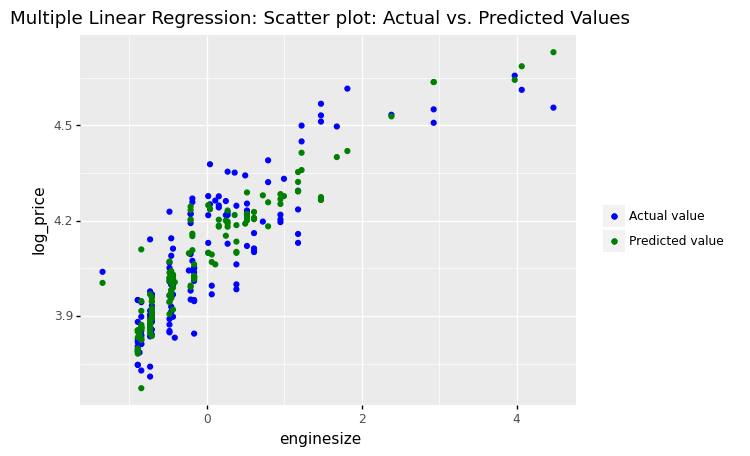

<ggplot: (339392609)>

In [225]:
(
    ggplot(df_train) 
    + geom_point(aes(x = 'enginesize', y='log_price',color='"Actual value"'))     
    + geom_point(aes(x = 'enginesize', y='model2_prediction',color='"Predicted value"')) 
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
    + labs(y='log_price', title = 'Multiple Linear Regression: Scatter plot: Actual vs. Predicted Values')
)

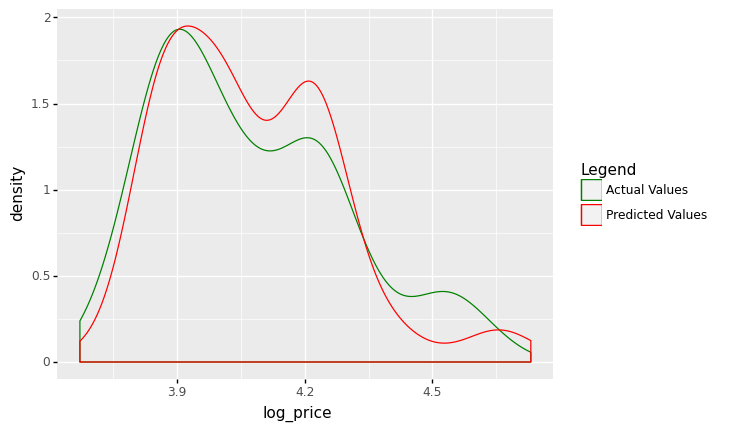

<ggplot: (339433137)>

In [226]:
(
    ggplot(df_train, aes(x='log_price'))
    +  geom_density(aes(y=after_stat('density'),color='"Actual Values"' ))
    +  geom_density(aes(x='model2_prediction',y=after_stat('density'),color='"Predicted Values"')) 
    +  scale_color_manual(values = ['green','red'], name = 'Legend') 
)

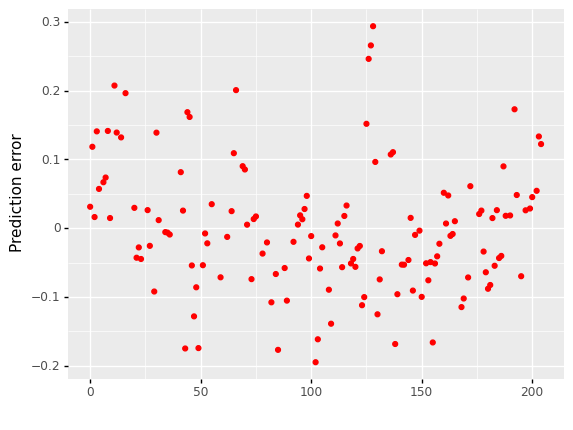

<ggplot: (339770197)>

In [227]:
(
    ggplot(df_train, aes(x='df_train.index'))
    +  geom_point(aes(y='model2_residual'),color='red')
    + labs(x = ' ', y='Prediction error')
)

In [228]:
from sklearn.metrics import * 

print('Mean Absolute Error:', mean_absolute_error(y_train.values , df_train['model2_prediction'].values))
print('Mean Squared Error:', mean_squared_error(y_train.values , df_train['model2_prediction'].values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train.values , df_train['model2_prediction'].values)))
print('R-squared:',r2_score(y_train.values , df_train['model2_prediction'].values))

#output_df = pd.DataFrame(columns=['MAE','MSE','R2-Score'],index=['Linear Regression','Multiple Linear Regression'])
output_df['MAE']['Multiple Linear Regression'] = np.mean(np.absolute(y_train.values - df_train['model2_prediction'].values))
output_df['MSE']['Multiple Linear Regression'] = np.mean((y_train.values - df_train['model2_prediction'].values) ** 2)
output_df['R2-Score']['Multiple Linear Regression'] = r2_score(y_train.values, df_train['model2_prediction'].values)



Mean Absolute Error: 0.07053176076943697
Mean Squared Error: 0.008493642666958187
Root Mean Squared Error: 0.09216096064472303
R-squared: 0.8287592172472993


In [229]:
output_df

,MAE,MSE,R2-Score
Linear Regression,0.098685,0.014494,0.707786
Multiple Linear Regression,0.070532,0.008494,0.828759


Predictions on the test set

In [230]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     341.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.71e-39
Time:                        14:57:34   Log-Likelihood:                 99.824
No. Observations:                 143   AIC:                            -195.6
Df Residuals:                     141   BIC:                            -189.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0737      0.010    401.792      0.000       4.054       4.094
enginesize     0.1874      0.010     18.480      0.000       0.167       0.207
==============================================================================
Omnibus:                        2.510   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.477
Skew:                           0.267   Prob(JB):                        0.290
Kurtosis:                       2.638   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
df_test[selected_var] = scaler.fit_transform(df_test[selected_var])

print(df_test[selected_var].describe())

y_test = df_test['log_price']
X_test = df_test[selected_var]

df_test['model1_prediction'] = model1.predict(X_test)
df_test['model1_residual'] = y_test - model1.predict(X_test)

df_test['model2_prediction'] = model2.predict(X_test)
df_test['model2_residual'] = y_test - model2.predict(X_test)

df_test.head()

         enginesize  curbweight       citympg
count  6.200000e+01   62.000000  6.200000e+01
mean   1.325105e-16    0.000000  4.476706e-17
std    1.008163e+00    1.008163  1.008163e+00
min   -1.747813e+00   -2.072576 -1.518004e+00
25%   -7.041865e-01   -0.549137 -6.519036e-01
50%   -1.931695e-01   -0.209465 -1.466783e-01
75%    4.114140e-01    0.521236  6.472472e-01
max    3.232804e+00    2.528250  3.101199e+00


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,log_price,model1_prediction,model1_residual,model2_prediction,model2_residual
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,64,4650,1.513348,42,10795.0,4.033223,4.075226,-0.042004,3.990809,0.042414
189,190,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,...,90,5500,-0.218853,29,11595.0,4.064271,4.005101,0.059170,4.005380,0.058891
58,59,3,mazda glc 4,gas,std,two,hatchback,rwd,front,95.3,...,135,6000,-1.373654,23,15645.0,4.194376,3.848668,0.345708,4.055878,0.138497
107,108,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,97,5000,-0.940604,24,11900.0,4.075547,4.064438,0.011109,4.223472,-0.147925
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,86,5800,0.214197,33,9095.0,3.958803,4.010495,-0.051693,3.994824,-0.036022


In [232]:
from sklearn import metrics

In [236]:
print('Mean Squared Error of Model1:', metrics.mean_squared_error(y_test, model1.predict(X_test)))
print('Mean Squared Error of Model2:', metrics.mean_squared_error(y_test, model2.predict(X_test)))

Mean Squared Error of Model1: 0.01659778668071687
Mean Squared Error of Model2: 0.008033914142105277


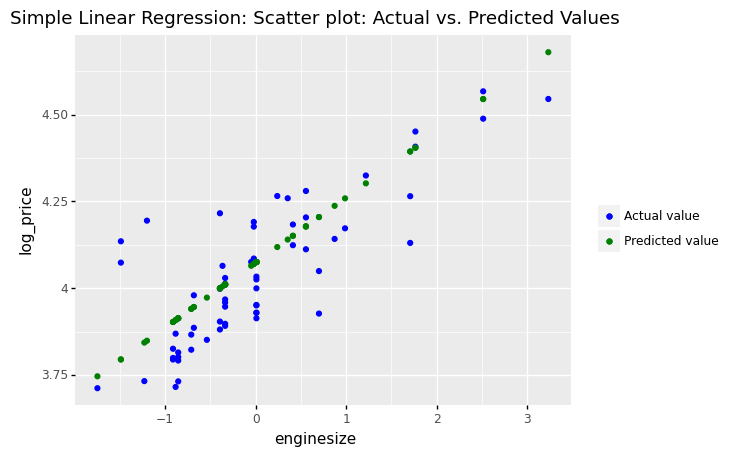

<ggplot: (339669021)>

In [237]:
(
    ggplot(df_test) 
    + geom_point(aes(x = 'enginesize', y='log_price',color='"Actual value"'))     
    + geom_point(aes(x = 'enginesize', y='model1_prediction',color='"Predicted value"')) 
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
    + labs(y='log_price', title = 'Simple Linear Regression: Scatter plot: Actual vs. Predicted Values')
)

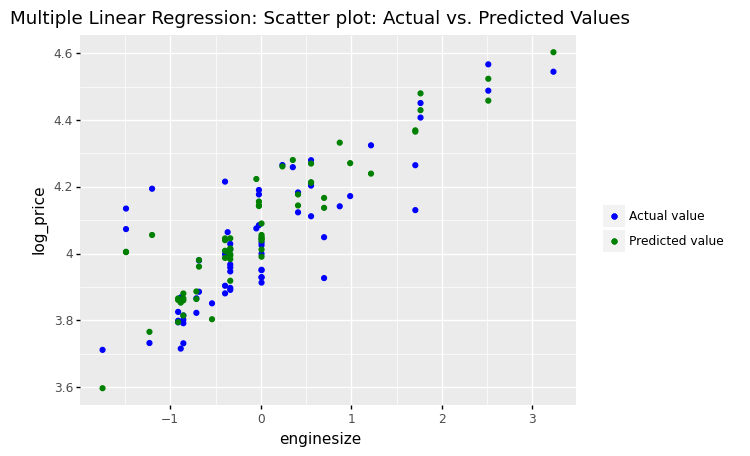

<ggplot: (339883713)>

In [238]:
(
    ggplot(df_test) 
    + geom_point(aes(x = 'enginesize', y='log_price',color='"Actual value"'))     
    + geom_point(aes(x = 'enginesize', y='model2_prediction',color='"Predicted value"')) 
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
    + labs(y='log_price', title = 'Multiple Linear Regression: Scatter plot: Actual vs. Predicted Values')
)